***Исследование поездок на арендованных самокатах***

Необходимо проанализировать данные популярного сервиса аренды самокатов GoFast. У меня есть данные о некоторых пользователях из нескольких городов, а также об их поездках. Хочу проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки, и с подпиской, условия в таком случае разные.

**Цель исследования:**
1)Выяснить, в каких городах сервис наиболее популярен
2)Понять, какого возраста больше пользователей, с подпиской или без
3)Определить расстояния и продолжительность поездок пользователей с и без подписки
4)Подвести итог - кто из пользователей тратят больше времени на поездку и приносят больше выручки - с подпиской или без нее.

**Ход исследования:**
Данные получены из нескольких файлов: users_go.csv,  rides_go.csv, subscriptions_go.csv. Перед началом работы я проверю данные на наличие пропусков и дубликатов. После этого объединю данные в сводную таблицу и визуализирую при помощи диаграмм. Так же проверю несколько гипотез

Подробные шаги прописаны ниже в проекте.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

следующим шагом выведу первые строки и инфу о типах строк для каждой таблицы

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод по шагу 1:**
 - уже сейчас заметно, что тип данных колонки с датой не соответствует дате;
 - остальные колонки в норме.


#### Шаг 2. Предобработка данных

##### Приведение date к типу даты pandas

In [9]:
rides['date'] = rides['date'].astype('datetime64')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создание нового столбца с номером месяца на основе столбца date

In [10]:
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [11]:
rides['year'] = rides['date'].dt.year
rides['year'].unique()

array([2021])

Вывод: Год только 2021 - месяцы корректно отобразятся.

##### Обработка дубликатов и пропущенных значений

###### Таблица users

In [12]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
print('Количество явных дубликатов:', users.duplicated().sum())

Количество явных дубликатов: 31


In [14]:
users = users.drop_duplicates()
print('Количество явных дубликатов после обработки:', users.duplicated().sum())

Количество явных дубликатов после обработки: 0


In [15]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

С городами все ок, все значения уникальные и записаны одинаково без сокращений, в остальных колонках и так содержатся уникальные значения

###### Таблица rides 

In [16]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

In [17]:
print('Количество явных дубликатов:', rides.duplicated().sum())

Количество явных дубликатов: 0


Пропусков и дубликатов нет, неочевидных дубликатов не дожно быть, т.к. там и так все уникальные значения пользователя.

###### Таблица subscriptions

In [18]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [19]:
print('Количество явных дубликатов:', subscriptions.duplicated().sum())

Количество явных дубликатов: 0


Пропусков и дубликатов нет, неочевидных дубликатов не дожно быть, т.к. таблица состоит из инфы всего лишь о 2-х подписках.

**Вывод по шагу 2:**
 - создала доп.столбец с месяцем
 - проверила каждую таблицу на наличие пропусков и устранила их
 - проверила каждую таблицу на наличие очевидных и неочевидных дубликатов и обработала их

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

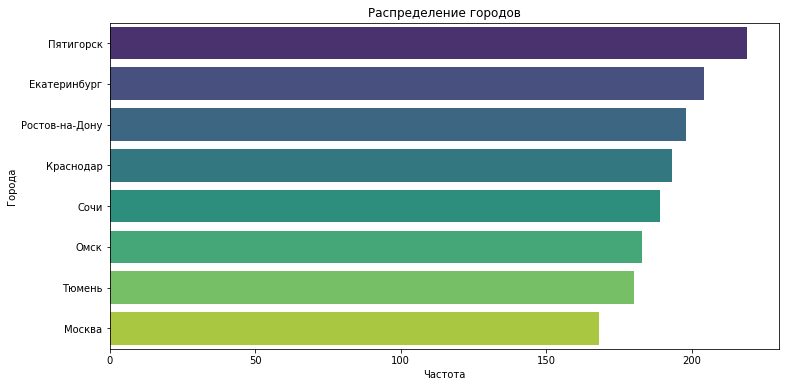

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

city_counts = users['city'].value_counts().sort_values(ascending=False)  # Сортируем значения по частоте

plt.figure(figsize=(12, 6))  # Устанавливаем размер графика

sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')  # Создаем горизонтальный столбчатый график

plt.xlabel('Частота')  
plt.ylabel('Города')
plt.title('Распределение городов')

plt.show()


##### Соотношение пользователей с подпиской и без подписки

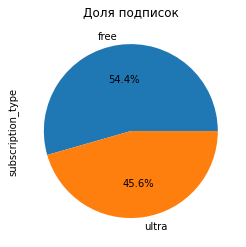

In [24]:
users['subscription_type'].value_counts().plot(kind='pie',figsize=(4,4), autopct='%1.1f%%', title='Доля подписок')
plt.show()


Сервис наиболее популярен у людей, не пользующихся подпиской - их более половины - 54%.

##### Возраст пользователей

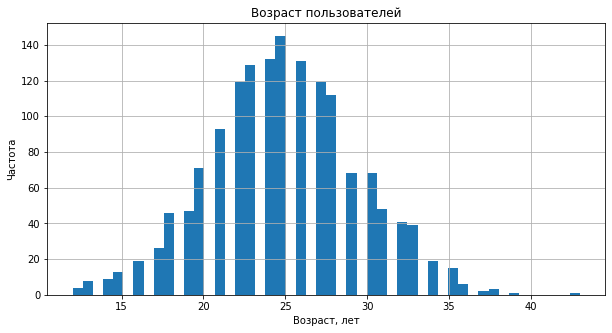

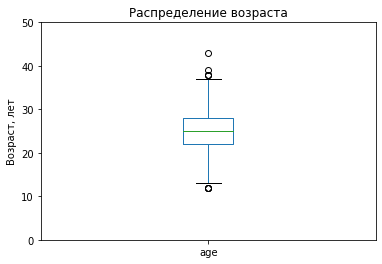

In [25]:
users['age'].hist(grid=True, figsize=(10,5), bins=50)

plt.title('Возраст пользователей')
plt.xlabel('Возраст, лет')  
plt.ylabel('Частота')
plt.show()

users['age'].plot.box(title='Распределение возраста', ylabel='Возраст, лет')
plt.ylim(0,50)
plt.show()

Сервис наиболее популярен у людей 25 лет. Мало пользователей возраст до 15 и после 35.

##### Расстояние, которое пользователь преодолел за одну поездку

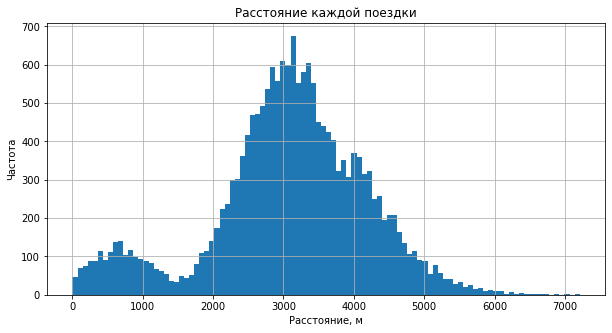

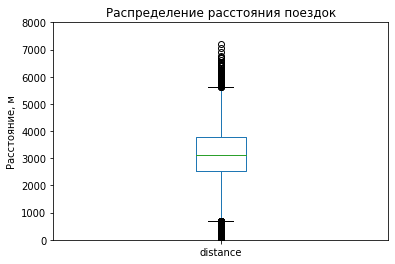

In [26]:
rides['distance'].hist(grid=True, figsize=(10,5), bins=100)

plt.title('Раcстояние каждой поездки')
plt.xlabel('Расстояние, м')  
plt.ylabel('Частота')
plt.show()

rides['distance'].plot.box(title='Распределение расстояния поездок', ylabel='Расстояние, м')
plt.ylim(0,8000)
plt.show()

В среднем, каждая поездка составляет 2500-3500 м. 

Слишком дальние поездки от 5000 м (или 5км) редки и их индивидуально менее 100, как и слишком коротких поездок, до 2000 м
Возможно, это невыгодно -  т.к. клиент платит за старт, поэтому стремится проехать как можно большее расстояние за поездку.


##### Продолжительность поездок

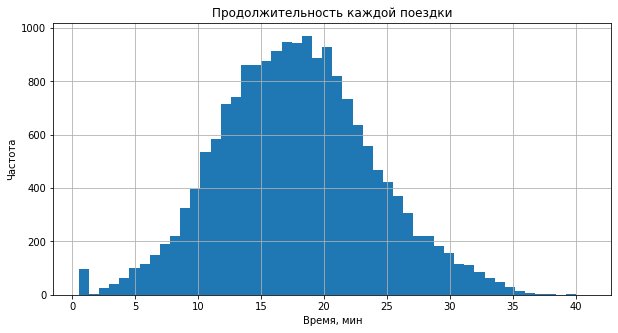

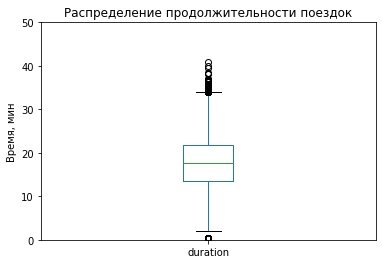

In [27]:
rides['duration'].hist(grid=True, figsize=(10,5), bins=50)

plt.title('Продолжительность каждой поездки')
plt.xlabel('Время, мин')  
plt.ylabel('Частота')
plt.show()

rides['duration'].plot.box(title='Распределение продолжительности поездок', ylabel='Время, мин')
plt.ylim(0, 50)
plt.show()

В основном, пользователи стремятся к тому, чтобы поездка длилась где-то от 15 до 20 мин.
Это соотносится с графиком выше, если средняя скорость поездки на самокате 10км/ч (или 166 м/мин), то за 15 мин как раз можно проехать в среднем от 2500 м.
Реже наблюдаются совсем долгие поездки (более 25 мин) и совсем короткие (до 10 мин)

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [28]:
#инфо до данных ДО объединения
rides.shape[0]

18068

In [29]:
total_table = users.merge(rides, on='user_id', how='outer')
total_table = total_table.merge(subscriptions, on='subscription_type', how='inner')
total_table

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


In [30]:
total_table.duplicated().sum()

0

In [31]:
total_table.shape[0]


18068

Объединила сначла таблицы по номеру ID, а затем подтянула инфу о стоимости подписки в зависимости от ее наличия.
Проверила, что дубликаты не появились. Размерность таблицы не поменялась (было 18068, и осталось тоже 18068), значит объединение прошло корректно, т.к. наиболее полная таблица это rides, в ней содержатся все данные о всех поездках.

##### Таблицы по подпискам / без нее

###### Пользователи без подписки

In [32]:
free = total_table.query('subscription_type == "free"')
free = free.reset_index(drop=True)
free

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
11564,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
11565,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
11566,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


###### Пользователи с подпиской

In [33]:
ultra = total_table.query('subscription_type == "ultra"')
ultra = ultra.reset_index(drop=True)
ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,2021,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,2021,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,2021,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,2021,6,0,199


##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

###### Без подписки

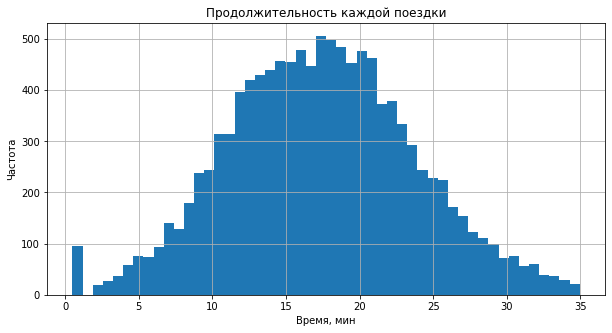

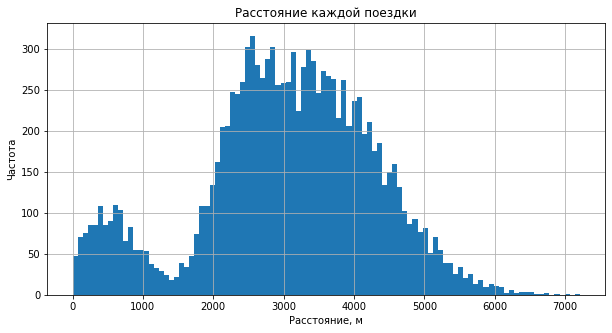

In [34]:
free['duration'].hist(grid=True, figsize=(10,5), bins=50)
plt.title('Продолжительность каждой поездки')
plt.xlabel('Время, мин')  
plt.ylabel('Частота')
plt.show()

free['distance'].hist(grid=True, figsize=(10,5), bins=100)
plt.title('Раcстояние каждой поездки')
plt.xlabel('Расстояние, м')  
plt.ylabel('Частота')
plt.show()


###### С подпиской

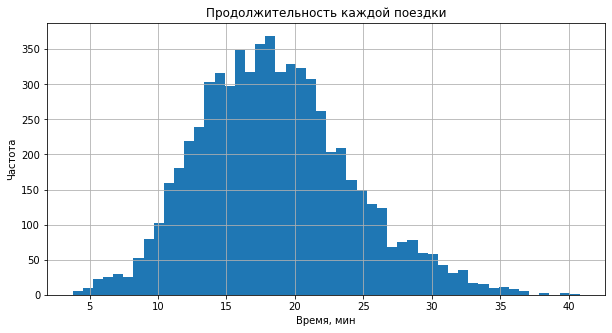

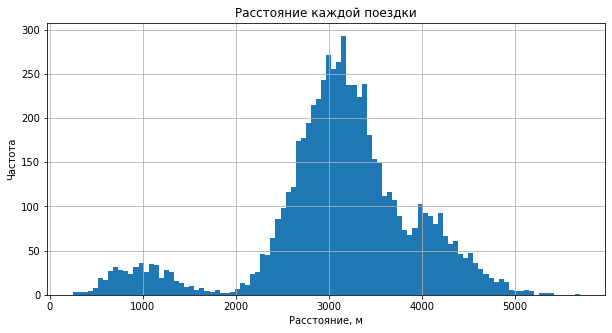

In [35]:
ultra['duration'].hist(grid=True, figsize=(10,5), bins=50)
plt.title('Продолжительность каждой поездки')
plt.xlabel('Время, мин')  
plt.ylabel('Частота')
plt.show()

ultra['distance'].hist(grid=True, figsize=(10,5), bins=100)
plt.title('Раcстояние каждой поездки')
plt.xlabel('Расстояние, м')  
plt.ylabel('Частота')
plt.show()

Графики выше показывают, что независимо от наличия подписки, наиболее популярная продолжительность поездки составляет от 15 до 20 мин
При этом, пользователи с подпиской реже ездят на дальние расстояние (более 5000м, чем пользователи без подписки).
И, если пользователи без подписки чаще всего ездят на расстояние от 2000 до 4000м, то пользователи с подпиской предпочитают больше расстояние в среднем около 3000 м.

#### Шаг 5. Подсчёт выручки

##### Суммарная информация о поездках пользователей

In [36]:
total_table['year'] = rides['date'].dt.year
total_table['year'].unique()

#отлично, у нас данные только за 2021 год, значит, разбивка на месяцы будет корректной

array([2021])

In [37]:
total_table.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month', 'year', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [38]:
total_table['duration'] = np.ceil(total_table['duration'])

In [39]:
total_table_pivot = total_table.pivot_table(index=['user_id', 'month'], 
                                      values = ['distance', 'duration'],
                                      aggfunc = {'distance' : 'sum', 'duration': ['sum', 'count']}).reset_index()          
total_table_pivot                                                                         

user_id month      distance duration      
                              sum    count   sum
0           1     1   7027.511294        2  42.0
1           1     4    754.159807        1   7.0
2           1     8   6723.470560        2  46.0
3           1    10   5809.911100        2  32.0
4           1    11   7003.499363        3  56.0
...       ...   ...           ...      ...   ...
11326    1534     6   3409.468534        2  26.0
11327    1534     8   7622.453034        2  48.0
11328    1534     9   4928.173852        1  23.0
11329    1534    11  13350.015305        4  78.0
11330    1534    12   2371.711192        1  16.0

[11331 rows x 5 columns]

In [40]:
#переименую колонки
total_table_pivot.columns = ['user_id', 'month', 'total distance', 'total quantity', 'total duration']
total_table_pivot    

,user_id,month,total distance,total quantity,total duration
0,1,1,7027.511294,2,42.0
1,1,4,754.159807,1,7.0
2,1,8,6723.470560,2,46.0
3,1,10,5809.911100,2,32.0
4,1,11,7003.499363,3,56.0
...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0
11327,1534,8,7622.453034,2,48.0
11328,1534,9,4928.173852,1,23.0
11329,1534,11,13350.015305,4,78.0


In [41]:
total_table.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month', 'year', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [42]:
#создам таблицу из сводной с инфой о подписках, чтобы соединить с таблицей выше
tab=total_table[['user_id', 'subscription_type','minute_price', 'start_ride_price',
       'subscription_fee']]

In [43]:
#создам сводную таблицу, чтобы рассчитать выручку
table_revenue = total_table_pivot.merge(tab, on='user_id')
table_revenue = table_revenue.drop_duplicates()
table_revenue

,user_id,month,total distance,total quantity,total duration,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42.0,ultra,6,0,199
12,1,4,754.159807,1,7.0,ultra,6,0,199
24,1,8,6723.470560,2,46.0,ultra,6,0,199
36,1,10,5809.911100,2,32.0,ultra,6,0,199
48,1,11,7003.499363,3,56.0,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
143446,1534,6,3409.468534,2,26.0,free,8,50,0
143459,1534,8,7622.453034,2,48.0,free,8,50,0
143472,1534,9,4928.173852,1,23.0,free,8,50,0
143485,1534,11,13350.015305,4,78.0,free,8,50,0


##### Помесячная выручка каждого пользователя

In [45]:
#добавлю колонку, в которой будет рассчитываться выручка
table_revenue['revenue_montly'] = (table_revenue['start_ride_price'] * table_revenue['total quantity']+
                                   table_revenue['minute_price']*table_revenue['total duration']+
                                   table_revenue['subscription_fee'])

In [46]:
table_revenue.head()

,user_id,month,total distance,total quantity,total duration,subscription_type,minute_price,start_ride_price,subscription_fee,revenue_montly
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
12,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
24,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0
36,1,10,5809.911100,2,32.0,ultra,6,0,199,391.0
48,1,11,7003.499363,3,56.0,ultra,6,0,199,535.0


#### Шаг 6. Проверка гипотез

##### Гипотеза 1 - тратят ли пользователи с подпиской больше времени на поездки?

H₀=пользователи с подпиской и без нее тратят одинаковое время на поездки
    
H1=пользователи с подпиской тратят больше времени на поездки, чем без нее
    

In [47]:
#создам таблицы пользователей с подпиской 
ultra_dur = ultra['duration']

#и без нее
free_dur = free['duration']


In [48]:
alpha = 0.05

# проводим ttest для двух сов-тей, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_dur, free_dur, alternative='greater', equal_var=False)
print(f'p-value: {results.pvalue}')

print(f'среднее первой сов-ти:{np.mean(ultra_dur)}')
print(f'среднее второй сов-ти:{np.mean(free_dur)}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 5.6757813771289775e-37
среднее первой сов-ти:18.54198516280583
среднее второй сов-ти:17.39090929866399
Отвергаем нулевую гипотезу


**Вывод:**  гипотеза 1 подтвердилась - в среднем, пользователи с подпиской катаются больше времени, чем пользователи без подписки.

##### Гипотеза 2 - Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

H₀=пользователи с подпиской за одну поездку проезжают 3130 м (H₀ = 3130)
    
H1=пользователи с подпиской за одну поездку проезжают менее или равно 3130 м ((H₀ > 3130)
    

In [49]:
#создам таблицу пользователей с подпиской 
ultra_dist = ultra['distance']
ideal = 3130 #значение, которое проверяем в гипотезе
alpha=0.01

results = st.ttest_1samp(
    ultra_dist, 
    ideal,
      alternative='greater')

print('p-значение:', results.pvalue)
print(f'среднее:{np.mean(ultra_dist)}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 



p-значение: 0.9195368847849785
среднее:3115.4453880370247
Не отвергаем нулевую гипотезу


**Вывод:** действительно, среднее расстояние в нашей совокупности меньше, чем 3130 метров, поэтому отвергаем одностороннюю альтернативную гипотезу и принимаем нулевую гипотезу.

##### Гипотеза 3 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

H₀=пользователи с подпиской приносят выручку такую же, как и пользователи без нее 
    
H1=пользователи с подпиской приносят больше выручки, чем пользователи без нее

In [50]:
#таблица для подписок
revenue_ultra = table_revenue.query('subscription_type == "ultra"')
revenue_ultra = revenue_ultra['revenue_montly']
revenue_ultra

0        451.0
12       241.0
24       475.0
36       391.0
48       535.0
         ...  
45467    301.0
45475    469.0
45483    385.0
45491    295.0
45499    355.0
Name: revenue_montly, Length: 4533, dtype: float64

In [51]:
#таблица без подписок
revenue_free = table_revenue.query('subscription_type == "free"')
revenue_free = revenue_free['revenue_montly']
revenue_free

45507     170.0
45525     962.0
45543     202.0
45561     178.0
45579     332.0
          ...  
143446    308.0
143459    484.0
143472    234.0
143485    824.0
143498    178.0
Name: revenue_montly, Length: 6798, dtype: float64

In [52]:
alpha = 0.05

# проводим ttest для двух сов-тей, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater', equal_var=False)
print(f'p-value: {results.pvalue}')

print(f'среднее первой сов-ти:{np.mean(revenue_ultra)}')
print(f'среднее второй сов-ти:{np.mean(revenue_free)}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
среднее первой сов-ти:362.7921906022502
среднее второй сов-ти:328.6413651073845
Отвергаем нулевую гипотезу


**Вывод:**  гипотеза 3 подтвердилась - в среднем, выручка от пользователя с подпиской выше, чем от пользователи без подписки.

##### Гипотеза 4 - Какой тест понадобится?

Для решения потребуется тест на равенство средних для зависимых выборок, до и после изменений

**Общий вывод:**

**1)** ***Саммэри по данным***:

- пропуски данных не обнаружены
- исправила тип данных в колонке дата
- убрала явные дубликаты

**2)** ***Исследование***:
- наибольшее кол-во поездок совершалось в Пятигорске за исследуемый период
- сервис наиболее популярен у людей, не пользующихся подпиской - их более половины - 54%.
- Сервис наиболее популярен у людей 25 лет. Мало пользователей возраст до 15 и после 35.
- в среднем, каждая поездка составляет 2500-3500 м. 
- в основном, пользователи стремятся к тому, чтобы поездка длилась где-то от 15 до 20 мин.
- независимо от наличия подписки, наиболее популярная продолжительность поездки составляет от 15 до 20 мин. При этом, пользователи с подпиской реже ездят на дальние расстояние (более 5000м, чем пользователи без подписки). И, если пользователи без подписки чаще всего ездят на расстояние от 2000 до 4000м, то пользователи с подпиской предпочитают больше расстояние в среднем около 3000 м.

**3)** ***Рассчитала выручку по месяцам на каждого пользователя и далее проверила несколько гипотез***

**4)** ***Проверка гипотез***:
- гипотеза 1 подтвердилась - в среднем, пользователи с подпиской катаются больше времени, чем пользователи без подписки.
- гипотеза 2 подтвердилась - действительно, среднее расстояние в нашей совокупности меньше, чем 3130 метров, поэтому отвергаем одностороннюю альтернативную гипотезу и принимаем нулевую гипотезу.
- гипотеза 3 подтвердилась - в среднем, выручка от пользователя с подпиской выше, чем от пользователи без подписки.
- если будем анализировать данные до и после обновления серверов, будем использовать проверку гипотезы для двух зависимых выборок.


Хочу отметить, что данные были довольно "чистыми" и потребовали минимальной обработки, за что спасибо исполнителю.
В качестве итогового вывода : пользователи с подпиской катаются больше времени и приносят больше выручки, чем пользователи без нее. Так что считаю, что стоит активно завлекать пользователей на приобретение подписки.